In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import torch.optim as optim

In this assignment, you will explore  Recurrent Neural Networks in more depth. An RNN is a part of the neural network's family used for processing sequential data such as text or audio. There are different types of RNNs concerning the number of inputs and outputs used in different problems. The figure below shows all of them. Based on the nature of the problem, one of these architecture comes in handy, for example:
* one to many: image captioning, where the input is an image and the output is a sequence of generated description words. 
* many to one: sentiment analysis, given a sentence, the model should predict the sentiment, which means one output for a sequence of words.  
* many to many:  machine translation, where the input sequence is in some language, and the output sequence is in some other language (or POS tagging task).

In the first problem, you will write the loss function equation for a many-to-many RNN through baby steps. The second problem is implementation, where you are supposed to implement an LSTM cell yourself. For the next two problems, you will train models for two real-world problems using your own LSTM cell.


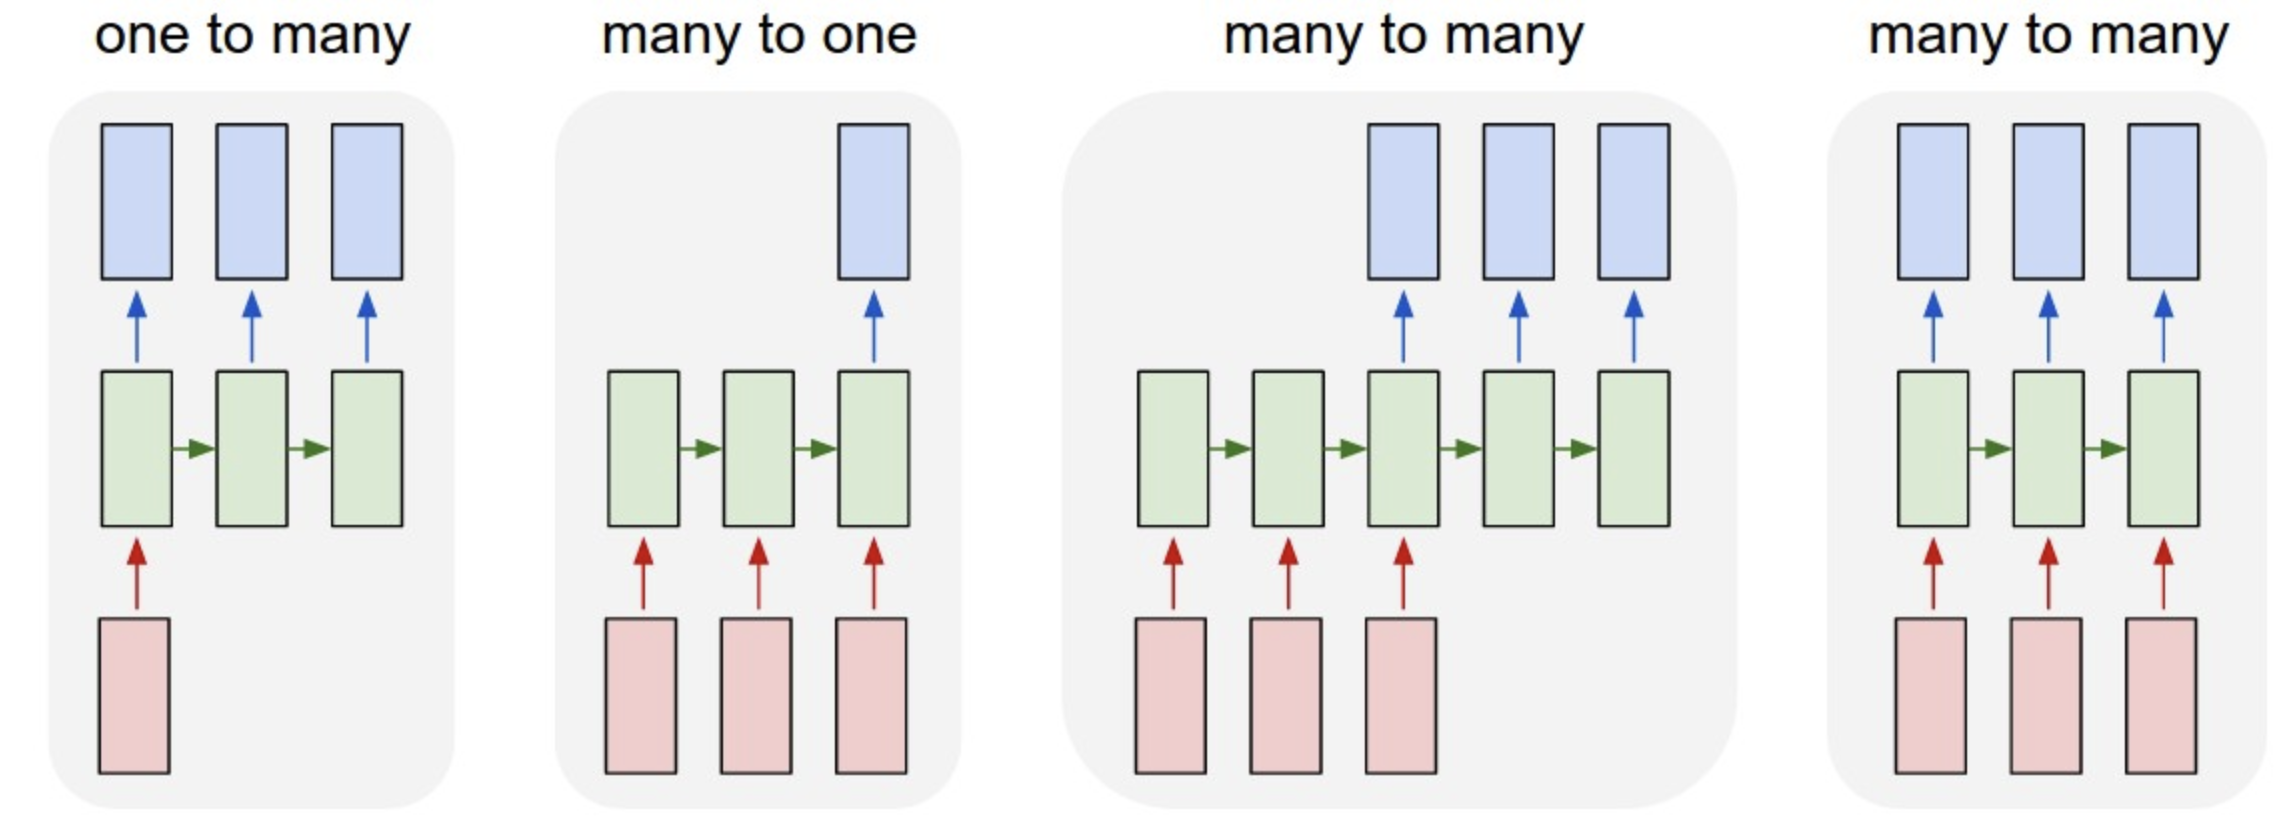

#Problem 1

Imagine, as shown in the image below, we want to build an RNN for a POS (part of speech) tagging task with 17 different labels, in which the model should predict the accurate tag for each word of input sequence based on the context of use. 

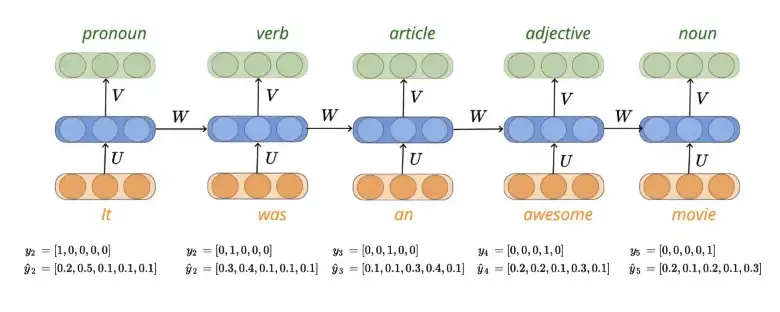

The architecture of our chosen RNN model is shown in the next image (the right one is unrolled form of the left RNN). The traditional approach to training deep networks is to do feed-forward and backpropagation continuously. But before all of it, we have to know how to calculate the loss function based on input data.

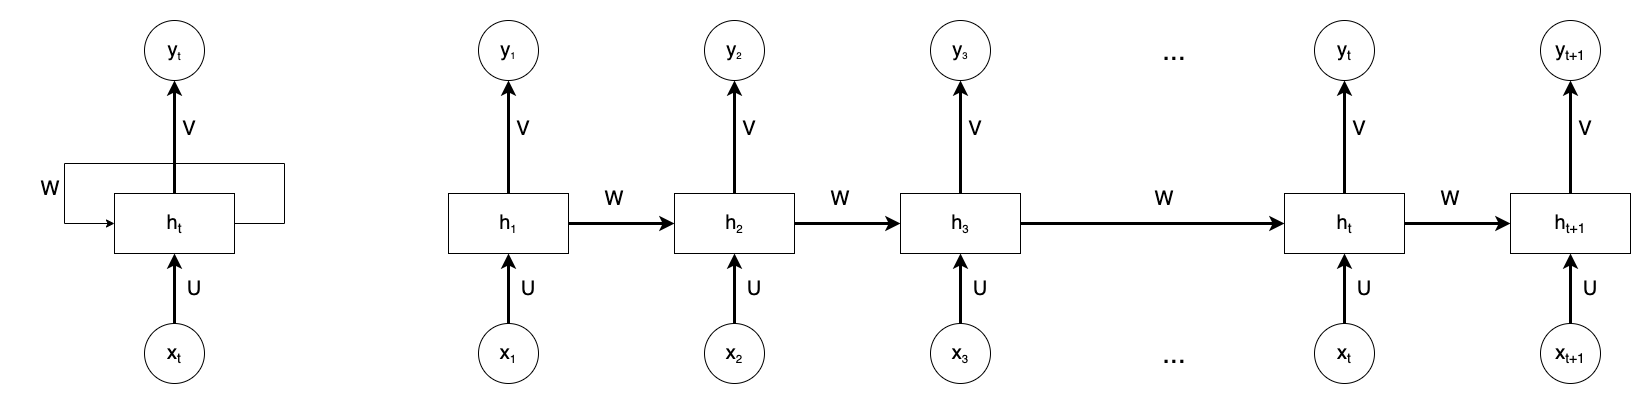


Since we have a prediction output per each timestep, the loss for a single input (a sequence of words) is the sum of each individual timestep's loss. So for a batch of size m, we have: 
$$\begin{aligned} 
Loss &= \frac{1}{m}\sum_{i}^{m}L(y^{(i)}, \hat{y}^{(i)}) \\
&= \frac{1}{m}\sum_{i}^{m}\sum^{T}_{t} L_t(y_t^{(i)},\hat{y}^{(i)}_{t})
\end{aligned}$$


Question: Use cross-entropy and write the equation of $L_t$ as a function of $y_t$ and $\hat{y}_t$. What is the dimension of $y_t$ and $\hat{y}_t$?

<font color='red'>Answer Here</font>

$$\begin{aligned} 
\mathscr{L}_{T} 
&= -\frac{1}{mT}\sum_{i=1}^{m}\sum^{T}_{t=1} log(\hat{y}_{itc})
\end{aligned}$$


<p id="04eb" data-selectable-paragraph="">For the ‘<em class="jt">iᵗʰ</em>’ training example, for the ‘jᵗʰ’ time step, the logarithm value of predicted probability (of the index corresponding to the true class) is computed and the average is taken</p>

<br>

17 dimantion because use the One-hot encoding 17 classes




---



Question: As always, we use the softmax function to make $\hat{y}_t$ a probability distribution over all the classes. With this in mind and based on the notation used in the above image, write the equation of $\hat{y}_t$ as a function of $h_t$ and $V$. The size of the hidden unit is a hyperparameter that should be set when an RRN is instantiated. If $h \in \mathbb{R}^p$, then what would be the dimensions of $V$?



<font color='red'>Answer Here</font>






---



Question: Following the mentioned arcitucture, determine the equation of $h_t$ where activation funcion is $tanh$. Given $X_t \in \mathbb{R}^d$, specify the dimentions of $W$ and $U$.  

<font color='red'>Answer Here</font>






---



"RNNs suffer from the problem of vanishing gradients, which hampers learning of long data sequences; in other words, RNNs cannot memorize data for a long time and begin to forget their previous inputs. The gradients carry information used in the RNN parameter update, and when the gradient becomes smaller and smaller, the parameter updates become insignificant, which means no real learning is done."


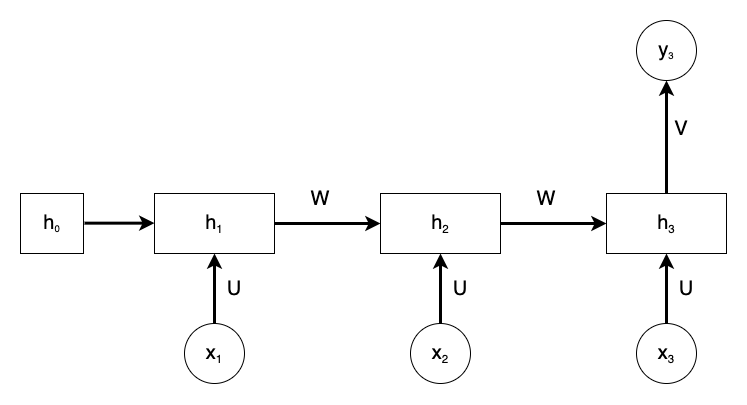


To see this phenomenon, let's calculate the gradients. Assume the length of the input sequence is $3$, as is shown in the image above, calculate the derivation of $L_3$ wrt $U$. (To do so, it is enough to calculate $\frac {\partial h_3}{\partial U}$)


$$\begin{aligned} 
\frac{\partial L_3}{\partial U} = \frac{\partial L_3}{\partial \hat{y}_3} \times \frac{\partial \hat{y}_3} {\partial h_3} \times \frac {\partial h_3}{\partial U}
\end{aligned}$$

Based on it, explain gradient vanishing for $X_1$.

Hint: write $\frac {\partial h_3}{\partial U}$ in form of $G_3X_3 + G_2X_2 + G_1X_1$



<font color='red'>Answer Here</font>




#Problem 2

Since simple RNNs suffer from forgetting early inputs in long sequences, another network called Long-Short-Term-Memory was introduced to solve it. Explain how LSTM mitigated this problem. (No need for mathematics proof)


<font color='red'>Answer Here</font>




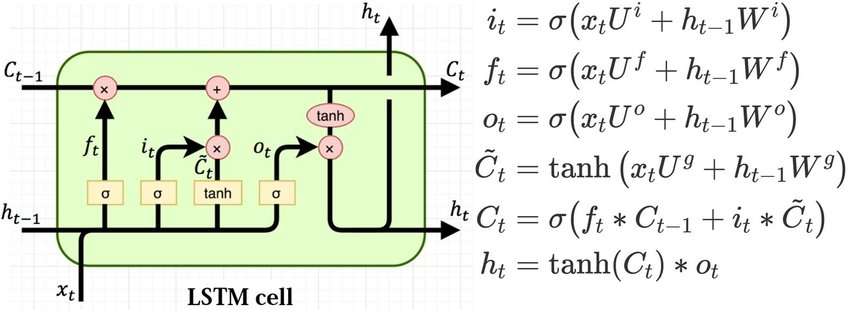

Architecture of an LSTM cell is shown in the image above, using that complete the code below to have a LSTM cell. As long as your LSTM cell works correctly, you do not have to stick to the provided prototype. Implement it however you are comfortable with.  

In [53]:
import torch
from torch import nn
import math

class LSTM_cell(torch.nn.Module):

  def __init__(self, input_sz=10, hidden_sz=20):
    super().__init__()
    self.input_size = input_sz
    self.hidden_size = hidden_sz

    #initialization 

    # input gate components
    self.U_i = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
    self.V_i = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
    self.b_i = nn.Parameter(torch.Tensor(hidden_sz))

    # forget gate components
    self.U_f = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
    self.V_f = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
    self.b_f = nn.Parameter(torch.Tensor(hidden_sz))


    # cell memory components
    self.U_c = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
    self.V_c = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
    self.b_c = nn.Parameter(torch.Tensor(hidden_sz))

    # out gate components
    self.U_o = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
    self.V_o = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
    self.b_o = nn.Parameter(torch.Tensor(hidden_sz))

    # self.init_weights()

  # def init_weights(self):
  #   stdv = 1.0 / math.sqrt(self.hidden_size)
  #   for weight in self.parameters():
  #     weight.data.uniform_(-stdv, stdv)


  # def forget_gate(self, x, h_prev):
  #   f = torch.sigmoid(x @ self.U_f + h_prev @ self.V_f + self.b_f)
  #   return f

  # def input_gate(self, x, h_prev):
  #   i = torch.sigmoid(x @ self.U_i + h_prev @ self.V_i + self.b_i)
  #   return i

  # def out_gate(self, x, h_prev):
  #   o = torch.sigmoid(x @ self.U_o + h_prev @ self.V_o + self.b_o)
  #   return o

  # def cell_memory_gate(self, x, h_prev, i, f, C_prev):
  #   C_had = nn.Tanh(x @ self.U_c + h_prev @ self.V_c + self.b_c)
  #   C = f * C_prev + i * C_had
  #   return C


  def forward(self, x, tuple_in ):
    (h_prev, C_prev) = tuple_in
    i = nn.Sigmoid(x @ self.U_i + h_prev @ self.V_i + self.b_i)
    f = nn.Sigmoid(x @ self.U_f + h_prev @ self.V_f + self.b_f)
    o = nn.Sigmoid(x @ self.U_o + h_prev @ self.V_o + self.b_o)
    C_had = nn.Tanh(x @ self.U_c + h_prev @ self.V_c + self.b_c)
    C = f * C_prev + i * C_had
    # f = self.forget_gate(x,h_prev)
    # i = self.input_gate(x, h_prev)
    # o = self.out_gate(x, h_prev)
    # C = self.cell_memory_gate(x, h_prev, i, f, C_prev)
    H = o * torch.tanh(C)
    return H, C

Now run the next three cells to check the sanity of your implantation. In this expremint using your LSTM cell we implement a two layer LSTM model. Given the observed values ​​of a Sine wave so far, the model should predict the next value of the wave.

In [54]:
#building RNN model
class Sequence(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn1 = LSTM_cell(1, 51)
        self.rnn2 = LSTM_cell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):

            h_t, c_t = self.rnn1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.rnn2(h_t, (h_t2, c_t2))

            output = self.linear(h_t2)
            outputs += [output]
    
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs


In [55]:
#generating Data

np.random.seed(2)

T = 20
L = 1000
N = 200

#generate 200 sin wave with length 1000
x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')



#keep the first three waves for test
input = torch.from_numpy(data[3:, :-1])
print(input.shape)
target = torch.from_numpy(data[3:, 1:])
print(target.shape)
test_input = torch.from_numpy(data[:3, :-1])
print(test_input.shape)
test_target = torch.from_numpy(data[:3, 1:])
print(test_target.shape)

torch.Size([197, 999])
torch.Size([197, 999])
torch.Size([3, 999])
torch.Size([3, 999])


In [56]:
#instantiates model and train it


seq = Sequence()

seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
# begin to train
for epoch in range(4):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        loss.backward()
        return loss

    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(test_input)
        loss = criterion(pred, test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()

STEP:  0


TypeError: ignored

In [36]:
def draw(predict, y):
        plt.figure(figsize=(30, 10))
        plt.title('Predict future values for time sequences', fontsize=30)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('y', fontsize=20)
        plt.plot(np.arange(input.size(1)), predict[:input.size(1)], 'g', linewidth=2.0, label='precition')
        plt.plot(np.arange(input.size(1)), y[:input.size(1)], 'r:', linewidth=2.0, label='true value')
        plt.legend()

#test 1
draw(y[0], test_target[0])

NameError: ignored

In [ ]:
#test 1
draw(y[1], test_target[1])

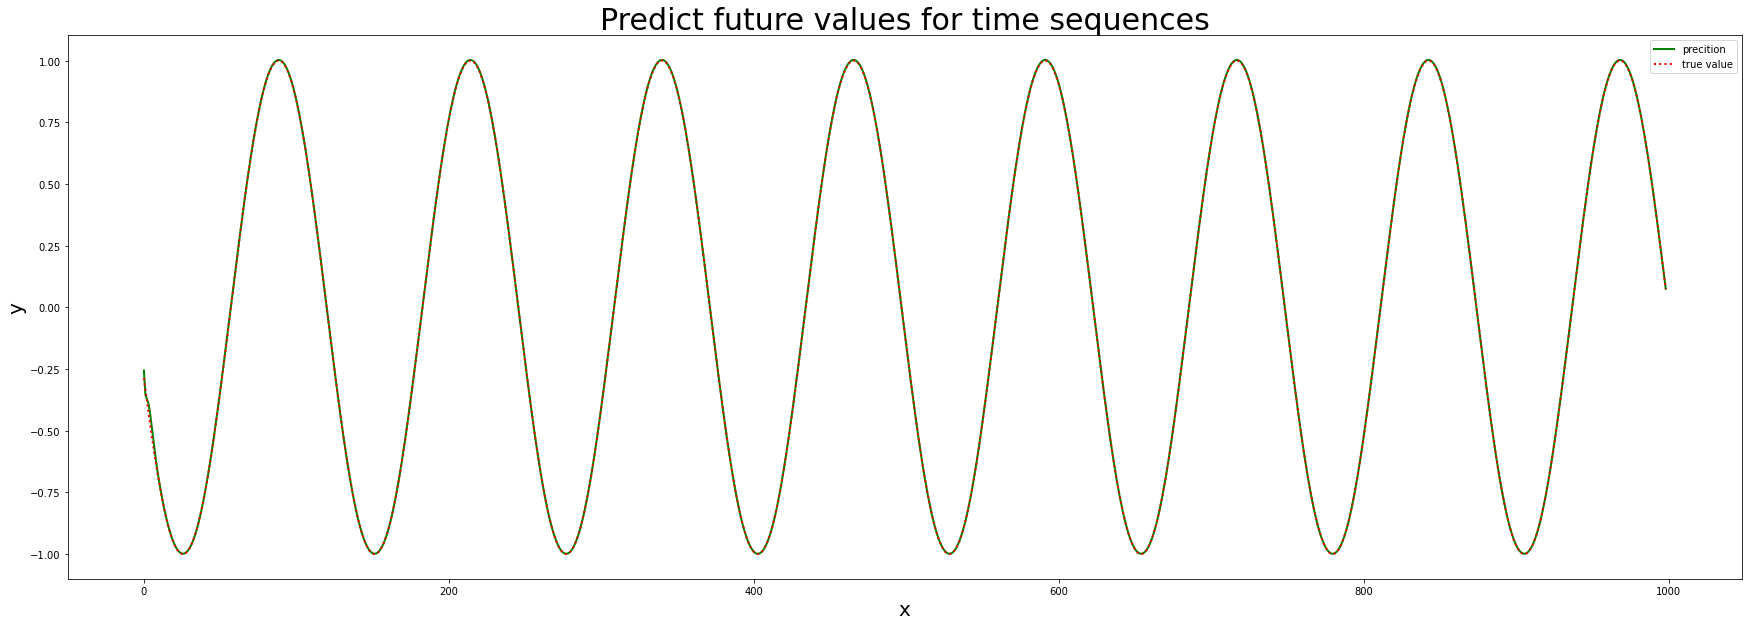

In [ ]:
#test 1
draw(y[2], test_target[2])

#Problem 3


In this problem, you will build and train a model using your own LSTM cell to predict the stock market.

Use the test and training datasets provided and build a model with the appropriate architecture of your choice. The only limitation is that you must use your own implemented LSTM cell. Each data input is information from 59 consecutive days, and your model should be able to predict the next day's prices as accurately as possible.

In [ ]:
import pandas as pd

In [ ]:
# Read data 
df = pd.read_csv('NVDA.csv')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.NVDA,D,20101004,0,11.24,11.430,11.01,11.23,18184874
1,US1.NVDA,D,20101005,0,11.48,11.500,11.29,11.32,18266877
2,US1.NVDA,D,20101006,0,11.32,11.370,10.67,10.78,25753399
3,US1.NVDA,D,20101007,0,10.82,10.840,10.38,10.70,18732301
4,US1.NVDA,D,20101008,0,10.65,10.950,10.51,10.86,16998198
...,...,...,...,...,...,...,...,...,...
2762,US1.NVDA,D,20210927,0,217.16,217.750,213.28,216.57,625939
2763,US1.NVDA,D,20210928,0,212.01,214.030,206.51,207.02,835341
2764,US1.NVDA,D,20210929,0,209.33,210.160,204.68,205.22,606902
2765,US1.NVDA,D,20210930,0,207.89,210.650,206.89,207.12,537697


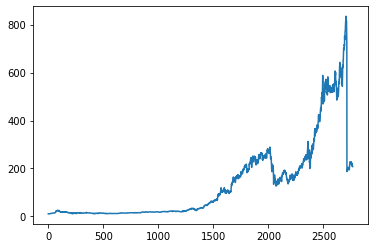

In [ ]:
plt.plot( df['<OPEN>'])

In [ ]:
# create train and test data
def load_data(stock, window_size):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length window_size
    for index in range(len(data_raw) - window_size): 
        data.append(data_raw[index: index + window_size,:-4])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

window_size = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df, window_size)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2166, 59, 5)
y_train.shape =  (2166, 5)
x_test.shape =  (541, 59, 5)
y_test.shape =  (541, 5)


In [ ]:
# Build model
#####################


In [ ]:
# Train model
#####################



In [ ]:
# Plot loss based on epochs for both test and train
#####################


In [ ]:
# make predictions
#####################


In [ ]:
# Visualising the prediction results 
#####################


#Problem 4


In this problem, we will train an LSTM network to generate Persian names. The model will see a sequence of characters corresponding to the names and will be trained with the objective of predicting the best next character for the given sequence. An overview of the model is illustrated in the picture below. 

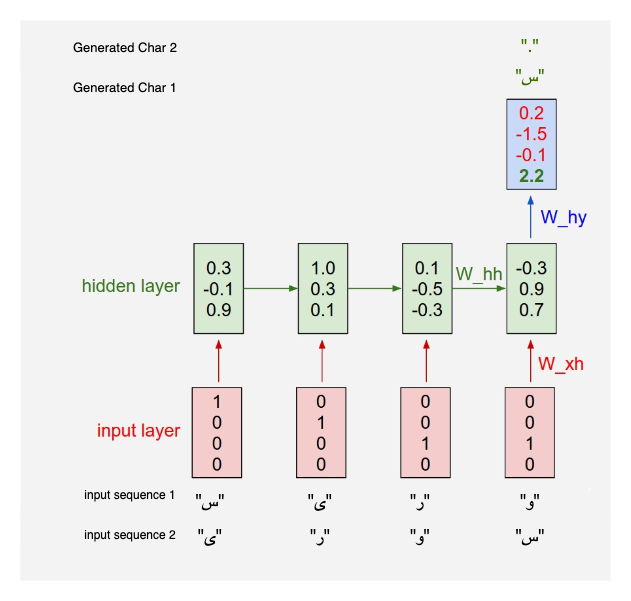

Quesrion: Teacher forcing is a technique used in training  of RNNs, study about it and explained it in your words.

<font color='red'>Answer Here</font>




Dataset `Persian_names` contains  ~4k names. For the first step, load the dataset and extract the names into `input_names`

In [ ]:
#import libraries 

In [ ]:
#####

input_names = 

#####

By joining all the names, we make a long string of names with `.` character as a discriminator; then, by moving a sliding window with size of the longest name over this string, we sample input training data. The output for each window is the next character to the window. In the cell below, complete the code to calculate the size of the longest name as `window_size`. The rest of the code extract inputs and outputs for training the model. 

In [ ]:
# Make it all to a long string
concat_all_names = '.'.join(input_names).lower()




window_size = #TODO





input_sequences = []  #inputs (x)
next_chars = [] #labels (y)

# moving sliding window over data to extart input sequences for training
for i in range(0, len(concat_all_names) - window_size, 1):
    input_sequences.append(concat_all_names[i: i + window_size])
    next_chars.append(concat_all_names[i + window_size])

num_sequences = len(input_sequences)

print('Number of training inputs:', num_sequences)
print('First 10 sequences and next chars:')
for i in range(10):
    print(f'X=[{input_sequences[i]}]   y=[{ next_chars[i]}]')

Find all the unique characters used in the names and make a dictionary, mapping each unique character to a unique number. We do so to convert characters that are of type `str` to numbers (or vectors) since the neural networks typically work with numbers to do their math!

In [ ]:
#TODO
num_uniq_char = #TODO
char2idx = #TODO

Now using the `char2indx` dictionary, create `X` and `y` as described below:

Map all characters of `input_sequences` and `next-char` to the numbers and then convert numbers to one-hot encoding. thus the shape of `X` and `y` should be `(num_sequences, window_size, num_uniq_char)`  and `(num_sequences, num_uniq_char)` respectively.

In [ ]:
#TODO

Build a model to predict the next character of the given sequence.

In [ ]:
# your model

Now train your model with epoch > 40.



In [ ]:
#Training

Finally, generate 15 distinct names using your trained model. Your generated names should be unique and new, not exist in the `Persian dataset`, and should have more than two characters. Ignore names that do not satisfy these conditions and generate a new one. 

At first, to generate next_char, you have to have an input sequence of length window_size; use `initial_sequence` for that. For the rest of the input sequences, each time, add the generated next_char previous step to the input sequence and remove the old one from the start of it. The characters between two generated `.`  forms a name. In other words, when `.` is selected as next_char the current name generation has been completed, and the next generated character will be the first char of the next name.

As output, your model would produce a probability distribution over all the characters, indicating how likely that character is to be the next_char. Typically we choose the most probable character for the final answer. But, in this problem, select next_char randomly with the distribution your model produces to avoid generating the same result at different runs. 

In [ ]:

initial_sequence = concat_names[-(max_sequence_length - 1):] + '.'

new_names = []


#TODO

Good Luck. 